# Letter To Prof. Assis.
> "Weber, Conservation of Energy, Kinetic Energy, odeint"

- toc: false
- branch: master
- badges: true
- comments: true
- author: JHM
- categories: [fastpages, jupyter]




# 2022-02-10-Verifying Conservation of Energy with Python.
Dear Professor Assis, 

I am currently studying the Weber potential $U= \frac{e_1 e_2}{r} (1-\frac{r'^2}{2c^2})$ in python, and specifically looking at the equations of motion of an isolated two-body system. For computation i have chosen one particle to be the origin, and look to solve the equations of motion for the second particle. In computations I take $e_1=e_2=1$ and $c=1$, and the relative mass of the second particle to be $m=0.5$. (Is that mass to small?)

I am fairly confident that I have correctly integrated the equations of motion using python's odeint. 

However I am not able to satisfactorily verify conservation of energy $d(T+U)=0$ along the trajectories, and I am not confident that I have the correct expression for kinetic energy $T$, i use the naive expression $T=mv^2/2$, where $v^2$ is computed in usual way as sum of squares of the velocities of the second particle of mass $m=0.5$. When I use the above expression for $T$ I find the sum $T+U$ is not constant along solutions to the equations of motion $mr''=ma=F$, where $F=-\hat{r} \frac{dU}{dr}$ is Weber's force. 

From your book on "Relational Mechanics" i understand that *kinetic energy* is more properly defined as the interaction energy of the particle with the stars at infinity. But is the naive kinetic energy $T=mv^2/2$ the correct expression for the isolated two-body system? 



The initial total energy T+U is equal to: 0.8091666666666666
The luminal energy is: 0.25
The energy is subliminal: False
Webers critical radius is equal to: 2.0
The initial radius r is within the Weber critical distance: True


Text(0.5, 0.92, 'velocity')

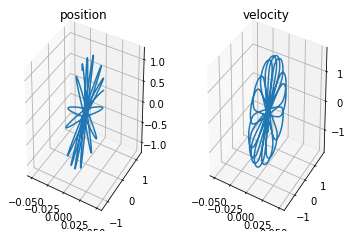

In [9]:
## import the basic packages.
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


m=0.5 ## mass of second test particle
c=1.0 ## speed of light constant in Weber's potential

## Kinetic Energy: we use the naive expression for vis viva. Is it correct?  
def T(vx, vy, vz):
    return m*(vx*vx+vy*vy+vz*vz)/2    

## Weber Potential Energy
def U(x,y,z,vx,vy,vz):
    r=(x*x + y*y + z*z)**0.5
    rdot=(x*vx+y*vy+z*vz)/r
    
    return (r**-1)*(1-(rdot**2)/2) 

## Integrating equations of motion relative Weber's Force Law.
## I think I have implemented everything correctly. The formula for rdot is from Relational Mechanics, pp.168
## but perhaps I have the wrong formula for r'' and have not applied Newtons second law F=mr'' correctly?
def weber(t, state):
    x, y, z, vx, vy, vz = state
    
    r=(x*x + y*y + z*z)**0.5
    rdot=(x*vx+y*vy+z*vz)/r
    
    A=r**-2
    B=1-(rdot*rdot)/2
    C=(m-((c*c*r)**-1))**-1

    dxdt = vx
    dydt = vy
    dzdt = vz
  
    dvxdt = (x/r)*A*B*C
    dvydt = (y/r)*A*B*C
    dvzdt = (z/r)*A*B*C
  
     
    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]
 
t_span = (0.0, 40.0)
t = np.arange(0.0, 40.0, 0.001)
 
y0=[0, 1.2, 0, 0, -0.4, .1]  ## initial state of the system y0=[x, y, z, vx, vy, vz]

result = odeint(weber, y0, t, tfirst=True)
 
Energy=T(y0[3], y0[4], y0[5] ) + U(y0[0],y0[1],y0[2],y0[3],y0[4],y0[5])

print('The initial total energy T+U is equal to:', Energy)
print('The luminal energy is:', m*c*c/2)
print('The energy is subliminal:', Energy < m*c**2 /2)

r=(y0[0]*y0[0] + y0[1]*y0[1] + y0[2]*y0[2])**0.5
print('Webers critical radius is equal to:',(m*c*c)**-1)

print('The initial radius r is within the Weber critical distance:', r < (m*c*c)**-1      )

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result[:, 0],
        result[:, 1],
        result[:, 2])
ax.set_title("position")

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result[:, 3],
        result[:, 4],
        result[:, 5])
ax.set_title("velocity")
 



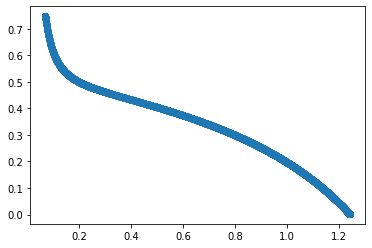

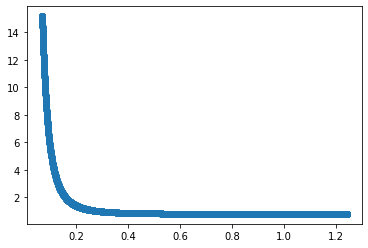

In [10]:
import matplotlib.pyplot
import pylab

def rho(x,y,z):
  return (x*x+y*y+z*z)**0.5

v_list=[]
for j in range(4000):
  v_list.append(
      (rho(result[j,0], result[j,1], result[j,2]),
       T(result[j,3], result[j,4], result[j,5]))
         )
  

U_list=[]
for j in range(4000):
    U_list.append(
        (rho(result[j,0], result[j,1], result[j,2]),
         U(result[j,0],result[j,1],result[j,2],result[j,3],result[j,4],result[j,5])+T(result[j,3], result[j,4], result[j,5]))
    )  

prelist1 = list(zip(*v_list))
pylab.scatter(list(prelist1[0]),list(prelist1[1]))
pylab.show()

prelist2 = list(zip(*U_list))
pylab.scatter(list(prelist2[0]),list(prelist2[1]))
pylab.show()

## Error. Expect to see conservation of energy T+U = constant in the second figure. However the sum T+U appears nonconstant.

Discussion: The horizontal axis is the radial distance $r$ from the origin, and the vertical axis is the energy value.
We expect the second figure to be a horizontal straight line. It does appear basically flat except for blow-up behaviour at small distance. Perhaps given the relative size of the interval of integration, namely $0.001$, the total energy $T+U$ is constant within error. 

Is this loss/gain of energy a defect from the odeint routine? In otherwords, is energy not conserved because of cumulative errors and approximations in the solution?

In [6]:
for j in range(50):
    print(
        U(result[j,0],result[j,1],result[j,2],result[j,3],result[j,4],result[j,5])
    + T(result[j,3], result[j,4], result[j,5])
    )

0.6813888888888889
0.6816686557880371
0.681949621710001
0.6822317838657116
0.6825151392305971
0.6827996855209162
0.6830854196454909
0.6833723386355962
0.6836604395334028
0.683949719392233
0.6842401752768086
0.6845318042635065
0.6848246035540551
0.6851185704066922
0.6854137019862019
0.685709995468147
0.6860074480391548
0.6863060568971592
0.6866058192516452
0.6869067322696227
0.6872087929447325
0.6875119984287184
0.6878163459034037
0.6881218325625335
0.6884284556120147
0.6887362122701597
0.6890450987325789
0.6893551145542436
0.6896662551800113
0.6899785178581948
0.6902918998406629
0.6906063983829406
0.6909220107443118
0.6912387341879169
0.6915565658811931
0.6918755029226542
0.6921955425346311
0.6925166819411264
0.6928389183668257
0.6931622490371347
0.6934866711782177
0.6938121820170333
0.6941387787813703
0.6944664586998799
0.6947952190021067
0.69512505691852
0.6954559696805385
0.695787954520561
0.6961210086719865
0.6964551293982145
